**Productos de Correlación y de Convolución**

In [65]:
import numpy as np
import cv2
from scipy import ndimage
a = np.array(np.random.randint(low = 0, high = 10, size = (4,4))) 
b=np.ones((2,2),dtype='uint8')

print(a)
print()
print(b)
print()
ndconv = ndimage.convolve(a, b, mode = 'constant') 
print(ndconv)
print()
ndcorr=ndimage.correlate(a,b,mode='constant')
print(ndcorr)

[[6 2 3 0]
 [1 1 4 7]
 [6 2 0 2]
 [6 2 6 4]]

[[1 1]
 [1 1]]

[[10 10 14  7]
 [10  7 13  9]
 [16 10 12  6]
 [ 8  8 10  4]]

[[ 6  8  5  3]
 [ 7 10 10 14]
 [ 7 10  7 13]
 [12 16 10 12]]


En este ejemplo, el kernel o máscara es simétrico.

Cambia el pivote. Convolución es la esquina superior izquierda.

Correlación es la esquina inferior derecha.


In [66]:
#La librería scipy tiene facilidades para calcular producto de convolución y correlación

from scipy import ndimage
import cv2
import matplotlib.pyplot as plt

a=np.array([[ 1.,  5.,  0.], 
   [ 7.,  2.,  9.], 
   [ 2.,  3.,  4.]],dtype='uint8')
b=np.array([[ 1.,  2.],
            [ 3.,  4.]],dtype='uint8')

#Expande los bordes con el valor 0
print(a)
print()

ndconv = ndimage.convolve(a, b, mode = 'constant') #trabaja con [[4,3],[2,1]]
print(ndconv)
print()
print(b)
print()
ndcorr=ndimage.correlate(a,b,mode='constant')
print(ndcorr)

[[1 5 0]
 [7 2 9]
 [2 3 4]]

[[35 33 18]
 [41 45 44]
 [17 24 16]]

[[1 2]
 [3 4]]

[[ 4 23 15]
 [30 40 47]
 [22 29 45]]


Verificación: ndconv[0][0] = 4*1+3*5+2*7+1*2 = 35, y ndconv[2][2] = 4*4+3*0+2*0+1*0 = 16
La operación comienza en la esquina izquierda y se expande hacia la derecha y hacia abajo
b para la convolución: [[ 4.,  3.],
                         [ 2.,  1.]]

 Para la correlación usa la matriz b original y se puede pensar que se expande desde la esquina inferior derecha, completando con ceros.
 ndcorr[0][0] = 1*0+2*0+3*0+4*1 = 4 ya que expandimos los bordes con el valor 0.
 
 **Zero Padding** Rellena con ceros.
 Esto lo hace esta librería por defecto.

In [67]:
cvfilter = cv2.filter2D(a, -1, b,borderType = cv2.BORDER_CONSTANT)
#El -1 indica que la salida será del mismo tipo que a
#Este tipo de bordertype rellena con ceros
#Se tiene el mismo resultado que con la función anterior
print(cvfilter)


[[ 4 23 15]
 [30 40 47]
 [22 29 45]]


In [68]:
cvfilter = cv2.filter2D(a, -1, b,borderType = cv2.BORDER_REPLICATE)
#El -1 indica que la salida será del mismo tipo que a
#Este tipo de bordertype rellena replicando primera fila y primera columna
#En la esquina pone el valor de a[0][0]
print(cvfilter)

[[10 34 20]
 [52 40 47]
 [35 29 45]]


In [69]:
print(a)
b1=np.ones((2,2),dtype='uint8')
print(b1)
print()
cvfilter = cv2.filter2D(a, -1, b1,borderType = cv2.BORDER_REPLICATE)
#El -1 indica que la salida será del mismo tipo que a
print(cvfilter)

[[1 5 0]
 [7 2 9]
 [2 3 4]]
[[1 1]
 [1 1]]

[[ 4 12 10]
 [16 15 16]
 [18 14 18]]


El resultado anterior se corresponde a una correlación que se expande desde la esquina inferior derecha. 
En los extremos, replica primera fila y primera columna.


**Máscaras impares**

Se rota la máscara respecto al centro para hacer la convolución.

El centro es el elemento que cobra importancia.

En general son simétricas, en ese caso la rotación no tiene importancia.

Ejemplo:
Máscara

 [7 8 3]
 [1 1 0]
 [1 2 1]
 
Máscara Rotada para convolucionar:

 [1 2 1]
 [0 1 1]
 [3 8 7]

Si no usamos las funciones específicas del Python, la rotación del kernel, se consigue con:


In [70]:
import numpy as np

kernel=np.array([[7,8,3],[1,1,0],[1,2,1]])

kernel_reversed=np.rot90(np.rot90(kernel))
print(kernel)
print()
print(kernel_reversed)

[[7 8 3]
 [1 1 0]
 [1 2 1]]

[[1 2 1]
 [0 1 1]
 [3 8 7]]


In [77]:
import numpy as np
import cv2
from scipy import ndimage

A=np.array([[1,2,1,5],[2,5,3,1],[1,4,1,0],[1,3,0,2]],'uint8')
kernel=np.array([[7,8,3],[1,1,0],[1,2,1]],dtype='uint8')

dst=ndimage.correlate(A, kernel, mode = 'constant') 
dstcv = cv2.filter2D(A, -1, kernel,borderType=cv2.BORDER_CONSTANT)

print("Matriz\n",A);print("\nKernel o Máscara\n",kernel);
print("\nResultado con ndimage.correlate 2D\n",dst)

print("\nResultado Filtrado con filter2D de openCV 2D\n",dstcv)


Matriz
 [[1 2 1 5]
 [2 5 3 1]
 [1 4 1 0]
 [1 3 0 2]]

Kernel o Máscara
 [[7 8 3]
 [1 1 0]
 [1 2 1]]

Resultado con ndimage.correlate 2D
 [[10 18 15 11]
 [22 43 51 52]
 [37 75 72 34]
 [21 46 39  9]]

Resultado Filtrado con filter2D de openCV 2D
 [[10 18 15 11]
 [22 43 51 52]
 [37 75 72 34]
 [21 46 39  9]]


## Filtros Lineales

**Filtro de la media**

Objetivo: suavizado

Ventaja: simple

Desventajas:

    Puede crear grises que no estaban en la imagen original

    Sensible a valores locales

**Aplicaciones**

- Suavizar imágenes, es decir, reducir la cantidad de
variaciones de intensidad entre píxeles vecinos.

- Conseguir que las intensidades de los objetos pequeños
se mezclen con el fondo con el fin de detectar los objetos
de mayor tamaño.

- Eliminar ruido.

Ingrese tamaño máscara (n impar y positivo)):14


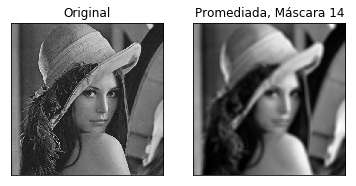

In [105]:
#Utilizo filter2D para hacer suavizado
def mascara(x):
    return(np.ones((x,x),np.float32)/(x*x))


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lenna.jpg',0)
n=int(input("Ingrese tamaño máscara (n positivo)):"))
kernel=mascara(n)

dst = cv2.filter2D(img,0,kernel)

plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst,cmap='gray'),plt.title('Promediada, Máscara %d' %(n))
plt.xticks([]), plt.yticks([])
plt.show()

# **Filtro Gaussiano**

Como el filtro de la media, sirve para suavizar o emborronar la imagen.

Modeliza la función gaussiana.

Los pesos en la máscara dependen de la distancia al píxel central. Mayor distancia, menor peso.


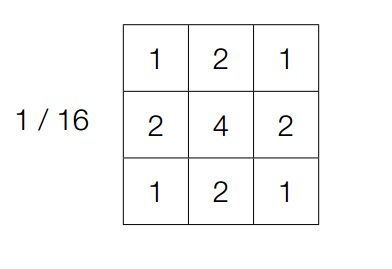

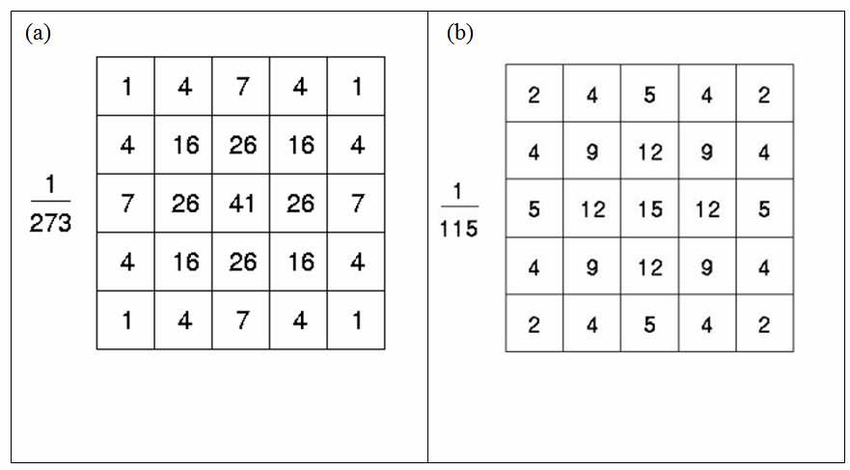

Aplicaciones

- Similar al filtro de la media:

    disminución de la nitidez,
    
    aumento de borrosidad, 
    
    pérdida de detalles.
    
  
- Produce un suavizado más uniforme que el de la media.

Ingrese tamaño matriz para filtro gaussiano (número impar y positivo )5


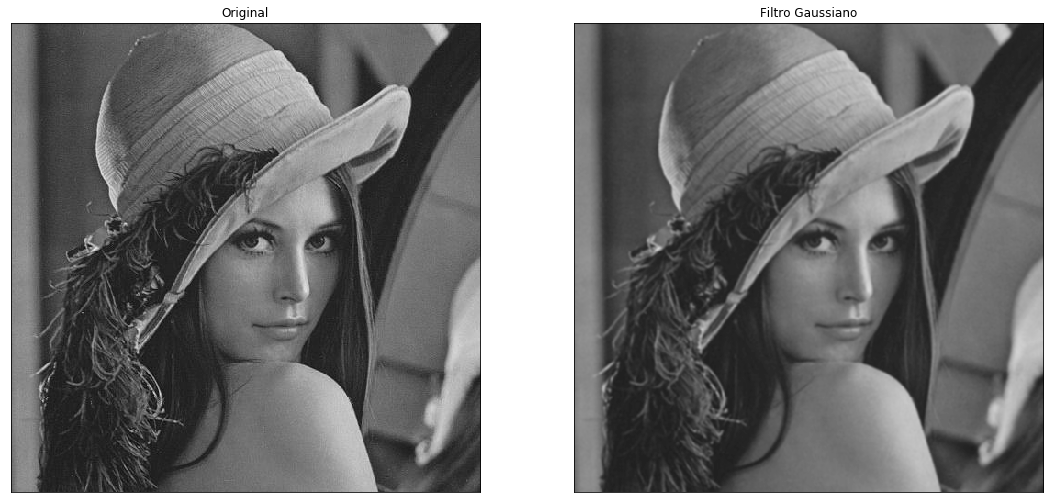

In [107]:
#Filtro gaussiano
import cv2
import numpy as np
import matplotlib.pyplot as plt
 
img = cv2.imread('lenna.jpg')#carga la imagen como numpy de uint8
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Convierte en escala de grises
n=int(input('Ingrese tamaño matriz para filtro gaussiano (número impar y positivo) '))

blur = cv2.GaussianBlur(gris,(n,n),0)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(121),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Gaussiano')
plt.xticks([]), plt.yticks([])
#print(type(blur[0] [0]))#verifica que devuelve uint8
plt.show()



## Tipos de Ruido

Ruido Gaussiano

Ruido Impulsivo

Ruido Sal y Pimienta




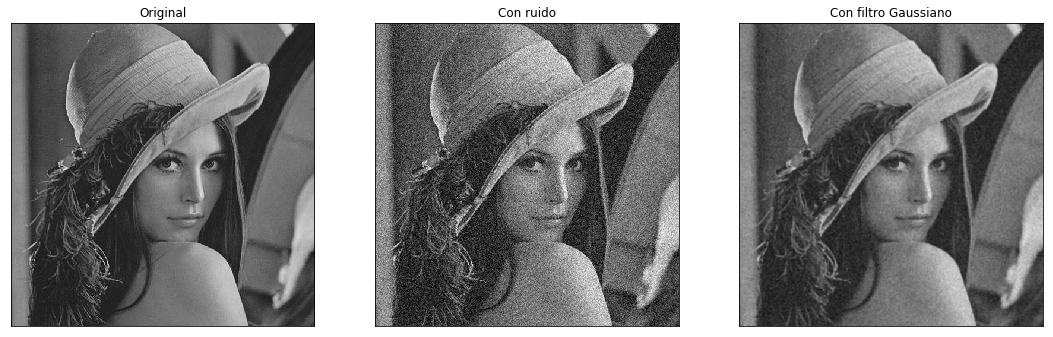

In [101]:
#Probaremos el filtro gaussiano añadiendo ruido gaussiano
#Generamos una imagen con ruido
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lenna.jpg')    # numpy-array of shape (N, M); dtype=np.uint8
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Convierte en escala de grises.

mean = 5.0   # valor medio
std = 20.0    # desviación estándar
ruido = np.random.normal(mean, std, gris.shape)
imagen_con_ruido=gris+ruido
imagen_ruidosa_recortada = np.clip(imagen_con_ruido,0,255) #para que no salga de los límites

imagenfinal=np.uint8(imagen_ruidosa_recortada)

#Aplico filtro gaussiano mascara de 5
blur = cv2.GaussianBlur(imagenfinal,(5,5),0)

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(131),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imagenfinal,cmap='gray',vmin=0,vmax=255),plt.title('Con ruido')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(blur,cmap='gray',vmin=0,vmax=255),plt.title('Con filtro Gaussiano')
plt.xticks([]), plt.yticks([])
plt.show()






### Filtros Estadísticos

Utilizan funciones estadísticas

- Filtro de la mediana: reemplaza los valores del bloque por su mediana (valor que deja igual cantidad de valores de intensidad superiores, como inferiores).

- Filtro del mínimo: reemplaza los valores del bloque por el mínimo (permite hallar los puntos oscuros). Elimina el ruido sal.

- Filtro del máximo: reemplaza los valores del bloque por el máximo (permite hallar los puntos brillantes). Elimina el ruido pimienta.

- Filtro de orden n: reemplaza los valores del bloque por el valor de orden n del vector formado por los elementos ordenados del bloque

- Filtro de moda: toma el valor que más se repite en el bloque en estudio.



### Filtro de la Mediana

Reemplaza todos los valores de intensidad de un bloque por el valor de la mediana.

Ventaja: Elimina los valores muy alejados (tipo sal y pimienta)



Ingrese el tamaño de la máscara (n): 5


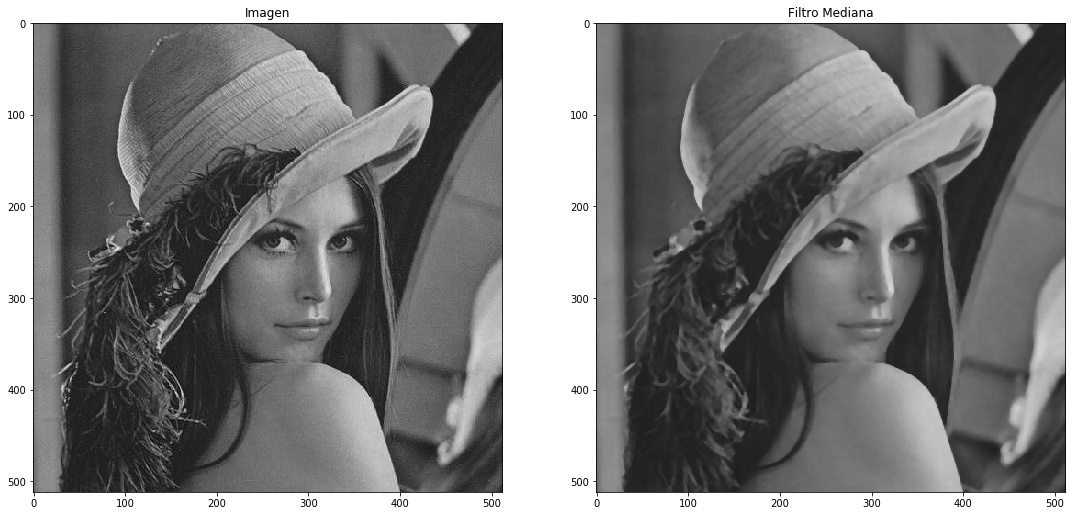

In [110]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lenna.jpg')    # numpy-array of shape (N, M); dtype=np.uint8

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#Convierte en escala de grises

#Filtro de la mediana
n= int(input('Ingrese el tamaño de la máscara (n): '))

median = cv2.medianBlur(gris,n)#filtro de la mediana

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(121),plt.imshow(gris,cmap='gray',vmin=0,vmax=255),plt.title('Imagen')

plt.subplot(122),plt.imshow(median,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Mediana')

plt.show()
#Para ver el efecto agregarle ruido salt & pepper

Ingrese tamaño kernel (n), positivo impar5


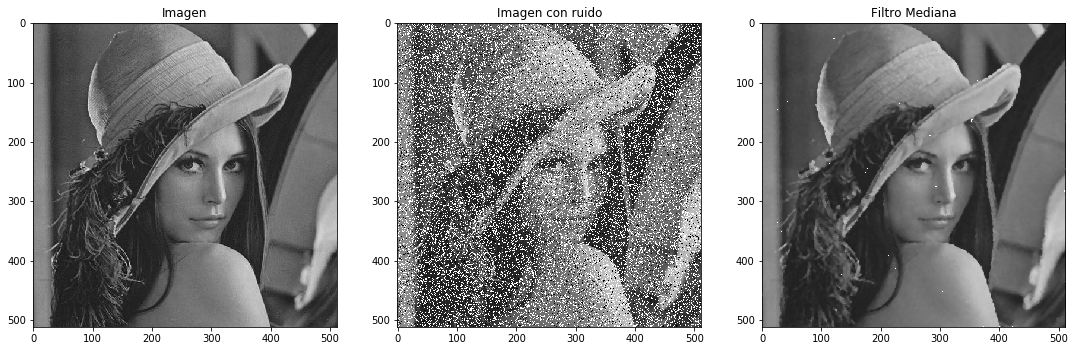

In [113]:
#Generar una imagen con ruido sal y pimienta
#Aplicar filtro de mediana
import numpy as np 
import random 
import cv2 

def sp_noise(image,prob,thres): 
#agregar ruido salt and pepper noise a una imagen 
#prob=probabilidad del ruido 

    output = np.zeros(image.shape,np.uint8) 
    
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]): 
            rdn = random.random() #devuelve flotante entre 0.0 y 1.
            if rdn < prob: 
                output[i][j] = 0 
            elif rdn > thres: 
                output[i][j] = 255 
            else: 
                output[i][j] = image[i][j] 
    return output 

image = cv2.imread('lenna.jpg')
image= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
noise_img = sp_noise(image,0.05,0.8) #prob=5% ruido=8%

cv2.imwrite('lennasp_noise.jpg', noise_img) 
n=int(input('Ingrese tamaño kernel (n), positivo impar: '))
median = cv2.medianBlur(noise_img,n)#filtro de la mediana

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(131),plt.imshow(image,cmap='gray',vmin=0,vmax=255),plt.title('Imagen')
plt.subplot(132),plt.imshow(noise_img,cmap='gray',vmin=0,vmax=255),plt.title('Imagen con ruido')
plt.subplot(133),plt.imshow(median,cmap='gray',vmin=0,vmax=255),plt.title('Filtro Mediana')

plt.show()

- Escriba el código que resulta de aplicar el filtro máximo a una imagen

- Repita para el filtro mínimo